Bird detection

In [3]:
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Helper function to apply the model to an image and return the predictions
def get_prediction(img_path, threshold):
    img = Image.open(img_path).convert("RGB")
    transform = T.Compose([T.ToTensor()]) # Defining PyTorch Transform
    img = transform(img) # Apply the transform to the image
    pred = model([img]) # Pass the image to the model
    pred_class = [i for i in list(pred[0]['labels'].numpy())] # Get the Prediction Score
    pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())] # Bounding boxes
    pred_score = list(pred[0]['scores'].detach().numpy())
    pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1] # Get list of index with score greater than threshold.
    pred_boxes = pred_boxes[:pred_t+1]
    pred_class = pred_class[:pred_t+1]
    
    return pred_boxes, pred_class

# Function to plot the image with bounding boxes
def plot_image(img_path, boxes):
    img = Image.open(img_path)
    fig, ax = plt.subplots(1, figsize=(12,9))
    ax.imshow(img)
    
    for box in boxes:
        rect = patches.Rectangle(box[0], box[1][0] - box[0][0], box[1][1] - box[0][1], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    
    plt.show()

# Image path
img_path = 'bird1.jpg'

# Get predictions
boxes, classes = get_prediction(img_path, threshold=0.8)

# Filter for class 15 (bird)
bird_boxes = [b for b, c in zip(boxes, classes) if c == 15]

# Plot the image with bounding boxes around birds
if bird_boxes:
    plot_image(img_path, bird_boxes)
else:
    print("No birds were detected in the image with high confidence.")


No birds were detected in the image with high confidence.


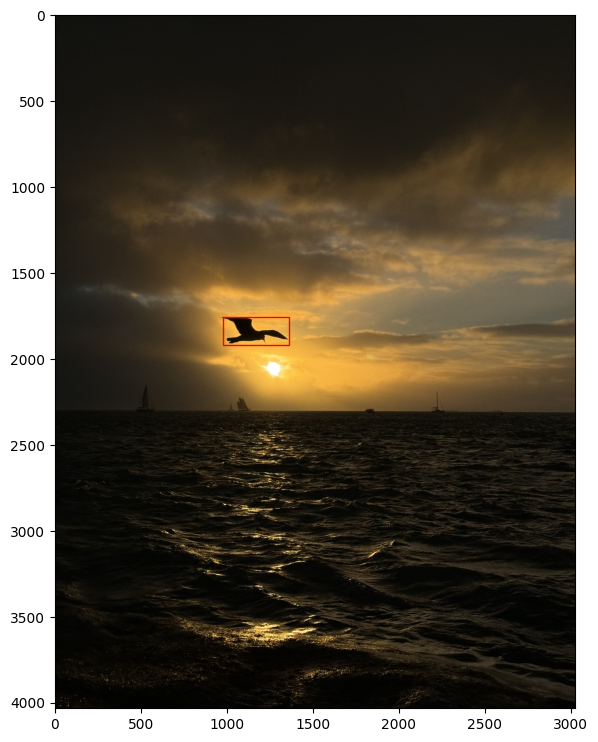

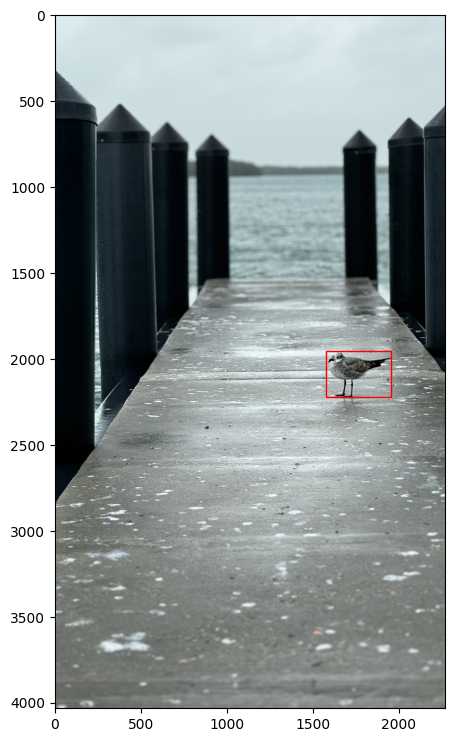

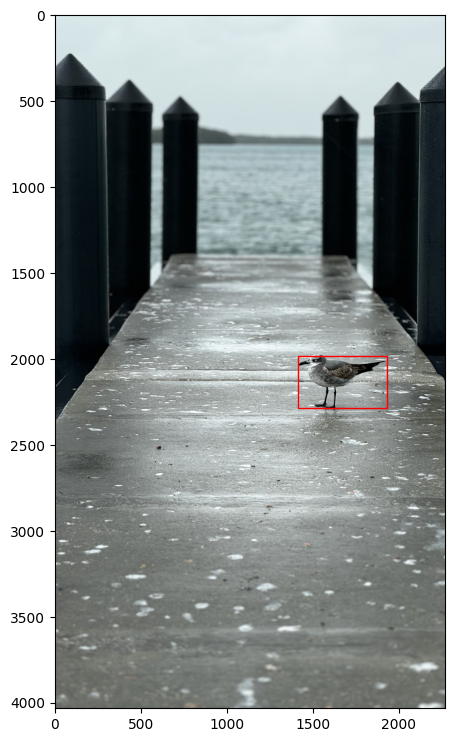

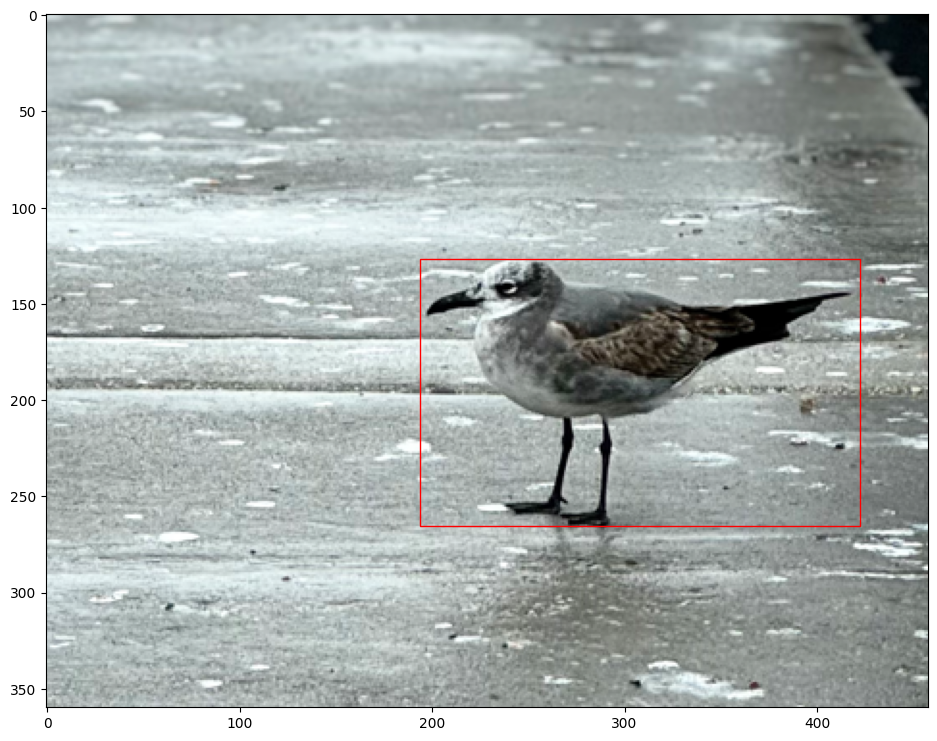

In [5]:
import torch
import torchvision.transforms as T
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Check if CUDA is available and set the device accordingly
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

# Load the model
model = fasterrcnn_resnet50_fpn(pretrained=True)
model = model.to(device)
model.eval()

# Helper function to apply the model to an image and return the predictions
def get_prediction(img_path, threshold):
    img = Image.open(img_path).convert("RGB")
    transform = T.Compose([T.ToTensor()]) # Defining PyTorch Transform
    img = transform(img).to(device) # Apply the transform to the image
    pred = model([img]) # Pass the image to the model
    pred_class = [i for i in list(pred[0]['labels'].cpu().numpy())] # Get the Prediction Score
    pred_boxes = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].cpu().detach().numpy())] # Bounding boxes
    pred_score = list(pred[0]['scores'].cpu().detach().numpy())
    pred_t = [pred_score.index(x) for x in pred_score if x > threshold][-1] # Get list of index with score greater than threshold.
    pred_boxes = pred_boxes[:pred_t+1]
    pred_class = pred_class[:pred_t+1]
    
    return pred_boxes, pred_class

# Function to plot the image with bounding boxes
def plot_image(img_path, boxes):
    img = Image.open(img_path)
    fig, ax = plt.subplots(1, figsize=(12,9))
    ax.imshow(img)
    
    for box in boxes:
        rect = patches.Rectangle(box[0], box[1][0] - box[0][0], box[1][1] - box[0][1], linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
    
    plt.show()

# Define the paths to the uploaded images
img_paths = ['bird 3.png', 'IMG_0350.png', 'IMG_0351.png','bird.png']

for path in img_paths:
    # Get predictions
    boxes, classes = get_prediction(path, threshold=0.8)
    
    # Filter for class 16 (bird)
    bird_boxes = [b for b, c in zip(boxes, classes) if c == 16]
    
    # Plot the image with bounding boxes around birds
    if bird_boxes:
        plot_image(path, bird_boxes)
    else:
        print(f"No birds were detected in the image with high confidence for image {path}.")
